Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

Importing Skin Cancer Data

To do: Take necessary actions to read the data

## 1. Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## 2. Data Reading/Data Understanding :

In [2]:

from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

# 2.1 Defining the path for train and test images :

In [3]:

# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer/Test')

In [4]:

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

## 3. Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.


**Create train & validation dataset from the train directory**

In [7]:
## Writing the train dataset
##  used seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
##  resizing images to the size img_height*img_width
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:

# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## 4. Dataset Visualisation :

# 4.1 Visualize all the Classes Present in the Dataset

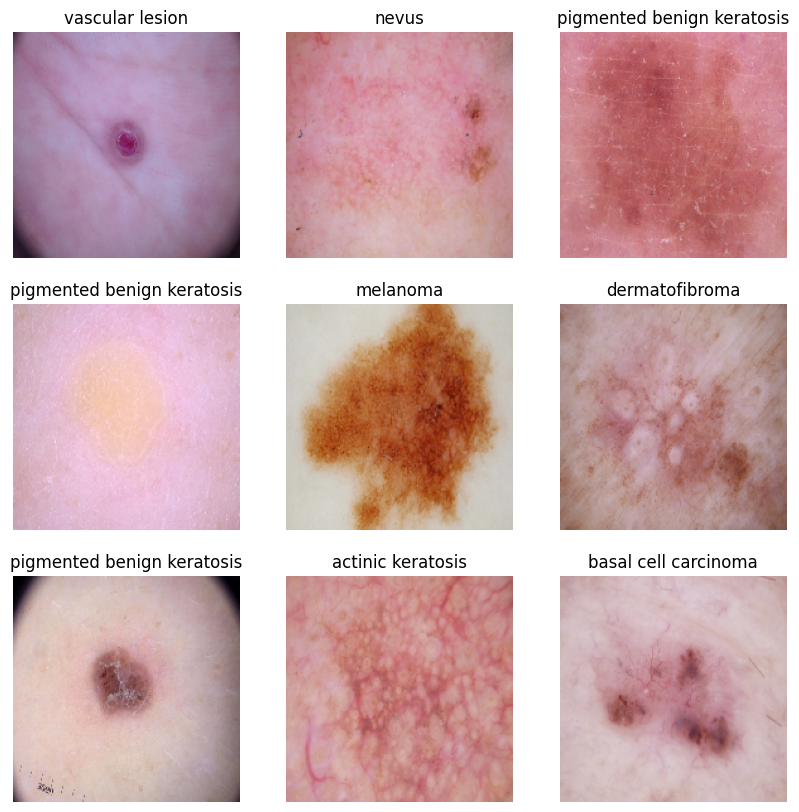

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [11]:

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 5. Model Building & Training :

# 5.1 Create the Model :
Creating a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [13]:
num_classes = 9

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 5.2 Compile the model
Choose an appropirate optimiser and loss function for model training

In [15]:

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

# 5.3 Train the model :

In [17]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.2146 - loss: 2.0831 - val_accuracy: 0.4385 - val_loss: 1.6327
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.4657 - loss: 1.5104 - val_accuracy: 0.4631 - val_loss: 1.5996
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.4895 - loss: 1.4794 - val_accuracy: 0.5235 - val_loss: 1.4589
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5624 - loss: 1.2680 - val_accuracy: 0.5324 - val_loss: 1.3812
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.6073 - loss: 1.1307 - val_accuracy: 0.5302 - val_loss: 1.4502
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6212 - loss: 1.1013 - val_accuracy: 0.5638 - val_loss: 1.3764
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6183 - loss: 1.0548 - val_accuracy: 0.5414 - val_loss: 1.4466
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.6650 - loss: 0.9781 - val_accuracy: 0.5436 - val_loss

# 5.4 Visualizing Training Results :

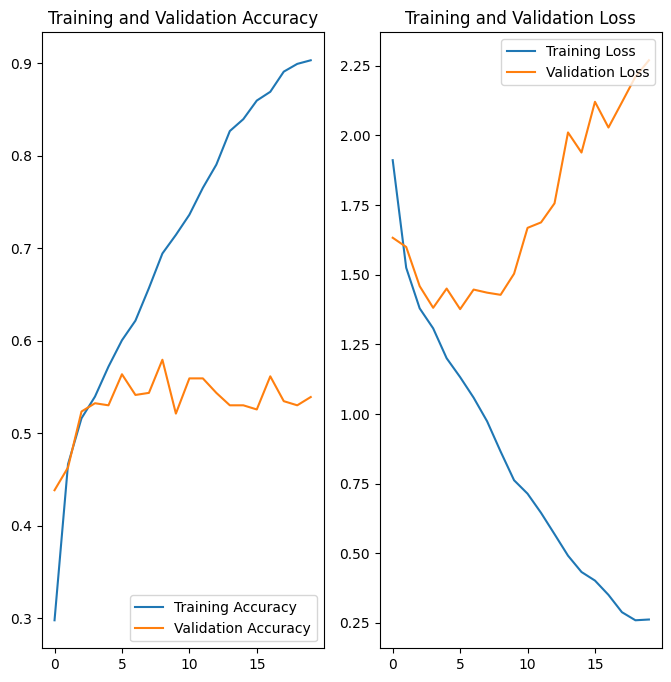

In [18]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 5.5 Findings after the model fit :
Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Clearly the modelis underfitting as validation loss is too high when compared with training loss resulting in poor validation accuracy

In [22]:
# data augumentation by flipping the images horizontally.
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
       input_shape=(img_height,
                    img_width,
                    3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

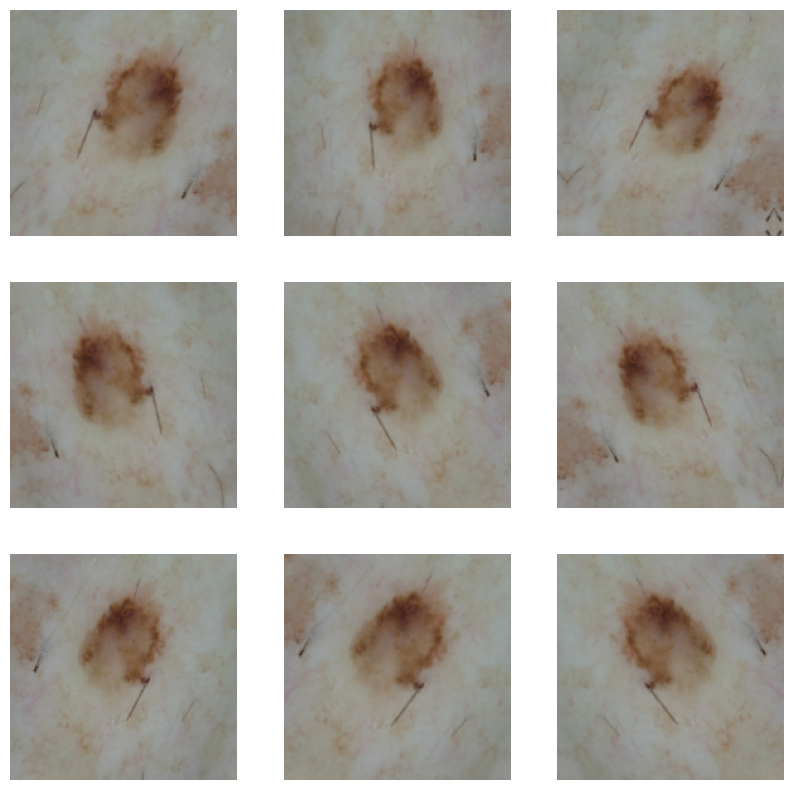

In [24]:
# Visualize augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


## 6. Model Building & Training on the augmented data
# 6.1 Create the Model

In [29]:
## Dropout layer introduced to tackle overfitting

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


# 6.2 Compiling the model

In [30]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 6.3 Training the model

In [31]:
## Training the model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.2284 - loss: 2.1530 - val_accuracy: 0.2483 - val_loss: 1.8673
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.3619 - loss: 1.7423 - val_accuracy: 0.4720 - val_loss: 1.5652
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.4698 - loss: 1.5116 - val_accuracy: 0.4452 - val_loss: 1.6254
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.5213 - loss: 1.3640 - val_accuracy: 0.5213 - val_loss: 1.4256
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5305 - loss: 1.3841 - val_accuracy: 0.5347 - val_loss: 1.3604
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5188 - loss: 1.3698 - val_accuracy: 0.5324 - val_loss: 1.4158
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5440 - loss: 1.2935 - val_accuracy: 0.5615 - val_loss: 1.3198
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.5388 - loss: 1.3010 - val_accuracy: 0.5436 - val_loss

# 6.4 Visualizing the results

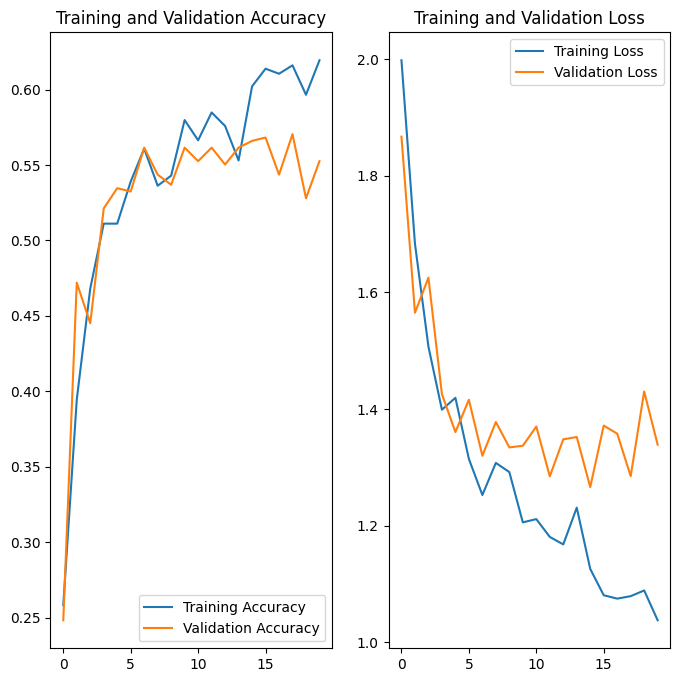

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

There is an very good improvement from the previous model but still the model can be improved as there is substantial difference in training and validation loss and accuracy.

Find the distribution of classes in the training dataset.

Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [33]:

## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [34]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer/Train/mela...,melanoma
1,/content/gdrive/MyDrive/Skin cancer/Train/mela...,melanoma
2,/content/gdrive/MyDrive/Skin cancer/Train/mela...,melanoma
3,/content/gdrive/MyDrive/Skin cancer/Train/mela...,melanoma
4,/content/gdrive/MyDrive/Skin cancer/Train/mela...,melanoma
...,...,...
2234,/content/gdrive/MyDrive/Skin cancer/Train/basa...,basal cell carcinoma
2235,/content/gdrive/MyDrive/Skin cancer/Train/basa...,basal cell carcinoma
2236,/content/gdrive/MyDrive/Skin cancer/Train/basa...,basal cell carcinoma
2237,/content/gdrive/MyDrive/Skin cancer/Train/basa...,basal cell carcinoma


Class=3, n=438 (19.562%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)
Class=5, n=462 (20.634%)
Class=2, n=95 (4.243%)
Class=4, n=357 (15.945%)
Class=0, n=114 (5.092%)
Class=6, n=77 (3.439%)
Class=1, n=376 (16.793%)


<BarContainer object of 9 artists>

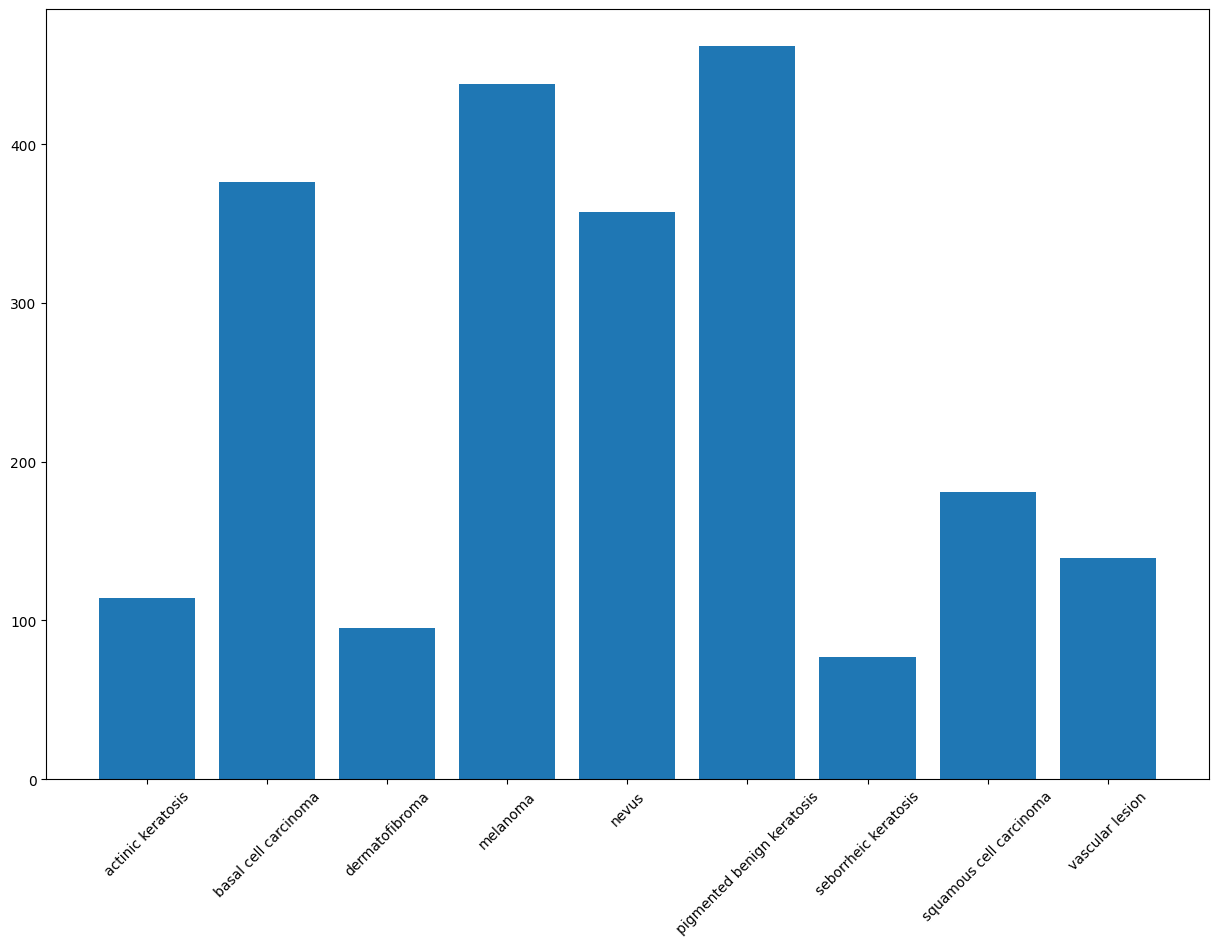

In [35]:
### Checking the distribution of all the images category wise

from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plt.bar(class_names,count)

## 7. Class Distribution

*   Which class has the least number of samples?
*   Which classes dominate the data in terms proportionate number of samples?


*   Seborrheic keratosis is having the lowest distribution
*   Pigmented Benign keratosis is having the highest distribution of data


## 8. Handling Class Imbalance
Rectify the class imbalance

You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [36]:

!pip install Augmentor

In [37]:
path_to_training_dataset="/content/gdrive/MyDrive/Skin cancer/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.


Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x787B5663E850>: 100%|██████████| 500/500 [00:32<00:00, 15.15 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x787B52296610>: 100%|██████████| 500/500 [00:21<00:00, 23.38 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x787B566DAFD0>: 100%|██████████| 500/500 [00:28<00:00, 17.41 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x787B55E00D90>: 100%|██████████| 500/500 [01:49<00:00,  4.57 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=962x722 at 0x787B55DEC510>: 100%|██████████| 500/500 [01:28<00:00,  5.66 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x787B56702A90>: 100%|██████████| 500/500 [00:22<00:00, 21.78 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x787B55E7BAD0>: 100%|██████████| 500/500 [00:52<00:00,  9.51 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x787B5662D210>: 100%|██████████| 500/500 [00:23<00:00, 21.58 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x787B55FA3E50>: 100%|██████████| 500/500 [00:24<00:00, 20.20 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [38]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Lets see the distribution of augmented data after adding new images to the original training data.**

In [39]:

path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/Skin cancer/Train/melanoma/output/melanoma_original_ISIC_0010652.jpg_91fdce65-67e4-46aa-8901-eb68956a6138.jpg',
 '/content/gdrive/MyDrive/Skin cancer/Train/melanoma/output/melanoma_original_ISIC_0000155.jpg_4024c01e-0f11-4e77-987c-9facbf9c1507.jpg',
 '/content/gdrive/MyDrive/Skin cancer/Train/melanoma/output/melanoma_original_ISIC_0000150.jpg_0be4e88a-47c0-4c94-b495-89fa7d302618.jpg',
 '/content/gdrive/MyDrive/Skin cancer/Train/melanoma/output/melanoma_original_ISIC_0000390.jpg_21f61ae4-3359-4337-a9e2-d931d9621dd9.jpg',
 '/content/gdrive/MyDrive/Skin cancer/Train/melanoma/output/melanoma_original_ISIC_0010267.jpg_8075dd8d-00c4-4249-bb2f-b3d373222262.jpg',
 '/content/gdrive/MyDrive/Skin cancer/Train/melanoma/output/melanoma_original_ISIC_0010977.jpg_62fca72d-d055-4550-adcf-612bae5982ca.jpg',
 '/content/gdrive/MyDrive/Skin cancer/Train/melanoma/output/melanoma_original_ISIC_0011139.jpg_1d23d97d-df95-4ed9-9e01-af50ae3e2a51.jpg',
 '/content/gdrive/MyDrive/Skin can

In [40]:

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new


['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [41]:

### Creating the new dataframe with path list and lesion list
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [45]:

### Concatenating the new dataframe with columns Path and label
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)

In [46]:

new_df['Label'].value_counts()

,count
Label,
pigmented benign keratosis,962
melanoma,938
basal cell carcinoma,876
nevus,857
squamous cell carcinoma,681
vascular lesion,639
actinic keratosis,614
dermatofibroma,595
seborrheic keratosis,577


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

# 8.1 Train the model on the data created using Augmentor

In [47]:
batch_size = 32
img_height = 180
img_width = 180

# 8.2 Create a training dataset

In [48]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


# 8.3 Create a validation dataset

In [50]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


# 8.4 Create your model (make sure to include normalization)

In [51]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

# 8.5 Compile your model (Choose optimizer and loss function appropriately)

In [52]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## 9. Model Building and Training on the rectified class imbalance data
# 9.1 Train your model

In [53]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 215s 974ms/step - accuracy: 0.1754 - loss: 2.1302 - val_accuracy: 0.3274 - val_loss: 1.7551
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 162s 957ms/step - accuracy: 0.3564 - loss: 1.6666 - val_accuracy: 0.4373 - val_loss: 1.4740
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 158s 936ms/step - accuracy: 0.4207 - loss: 1.4636 - val_accuracy: 0.4395 - val_loss: 1.4011
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 159s 941ms/step - accuracy: 0.4612 - loss: 1.3754 - val_accuracy: 0.5085 - val_loss: 1.3253
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 203s 949ms/step - accuracy: 0.5058 - loss: 1.2414 - val_accuracy: 0.5241 - val_loss: 1.2728
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 162s 958ms/step - accuracy: 0.5598 - loss: 1.1474 - val_accuracy: 0.5650 - val_loss: 1.1692
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 162s 956ms/step - accuracy: 0.5882 - loss: 1.0467 - val_accuracy: 0.6169 - val_loss: 1.0201
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 157s 929ms/step - accuracy: 0.6434 -

# 9.2 Visualize the model results

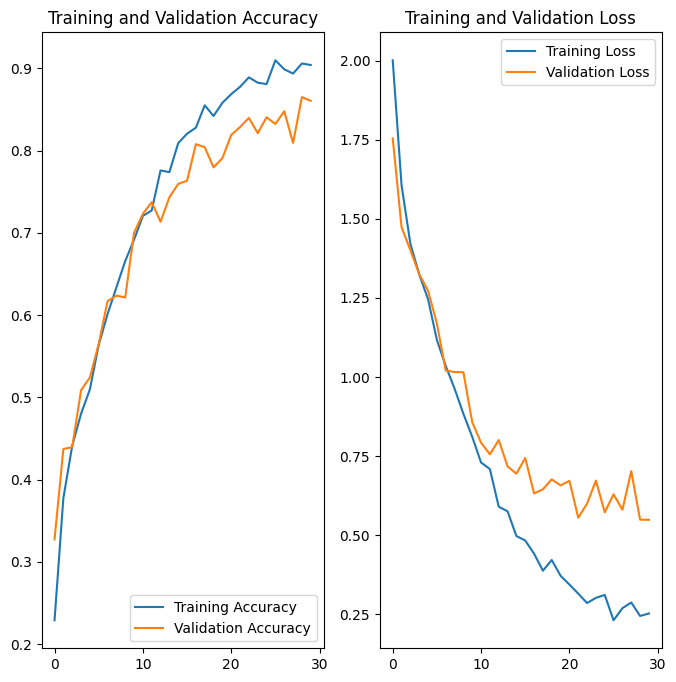

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 9.3 Findings
Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

The class rebalance helped in reducing overfititng of the data and thus the loass is beng reduced But it reduced the Acurracy very low
Then we introduced dropout which reduced the over fit
At last we tried Batch Normalization and Augumentation which really helped in carry forward
We can also see that validation accuracy is also around 84%, which is very close to training accuracy, hence there is no overfitting/underfitting
The model was also evaluated with more data augmentation techniques but the accuracy reduced a lot because of varying differences between images. But it can be rectified by training it for more number of epochs.